<center><h1>DSCI 552 Machine Learning for Data Science Final Project</h1></center>
<br>
<center> <font size="4">Name:Chung Ming Wu</font></center>

<center> <font size="4">USC_ID:7703568593</center>
    
<center> <font size="4">Github_Username:andywu96 </center>

## 1. Text Classification
### 1-(a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1-(b) Data Exploration and Pre-processing

(i). You can use binary encoding for the sentiments , i.e y = 1 for positive sentiments and y = -1 for negative sentiments.

(ii). The data are pretty clean. Remove the punctuation and numbers from the data.

In [2]:
import os
import string

# read neg txt files
path_neg = '../data/neg'
files_neg = sorted(os.listdir(path_neg))

file_neg_dict = {}
for file in files_neg:
    position = path_neg+ '//' +file
    name = str(file)[:5]
    with open(position, 'r', encoding = 'utf-8') as f:
        data = f.read()
        
        # Remove all punctuation and numbers from the data
        new_string = data.translate(str.maketrans('', '', string.punctuation))
        new_string = new_string.translate(str.maketrans('', '', string.digits))
        
        file_neg_dict[name] = new_string
        
# read pos txt files
path_pos = '../data/pos'
files_pos = sorted(os.listdir(path_pos))

file_pos_dict = {}
for file in files_pos:
    position = path_pos+ '//' +file
    name = str(file)[:5]
    with open(position, 'r', encoding = 'utf-8') as f:
        data = f.read()
        
        # Remove all punctuation and numbers from the data
        new_string = data.translate(str.maketrans('', '', string.punctuation))
        new_string = new_string.translate(str.maketrans('', '', string.digits))
        
        file_pos_dict[name] = new_string

(iii). The name of each text file starts with cv number. Use text files 0-699 in each
class for training and 700-999 for testing.

In [3]:
# separate the training and testing for each class

number_key = [i for i in range(700)]
file_neg_dict_train = {x: file_neg_dict[x] for x in file_neg_dict if int(str(x[2:5])) in number_key}

number_key = [i for i in range(700,1000)]
file_neg_dict_test = {x: file_neg_dict[x] for x in file_neg_dict if int(str(x[2:5])) in number_key}

number_key = [i for i in range(700)]
file_pos_dict_train = {x: file_pos_dict[x] for x in file_pos_dict if int(str(x[2:5])) in number_key}

number_key = [i for i in range(700,1000)]
file_pos_dict_test = {x: file_pos_dict[x] for x in file_pos_dict if int(str(x[2:5])) in number_key}

(iv). Count the number of unique words in the whole dataset (train + test) and
print it out.

In [4]:
# transform neg and pos dict into a list
values_pos = []
values_neg = []

items_neg = file_neg_dict.items()
for item in items_neg:
    values_neg.append(item[1])
    
items_pos = file_pos_dict.items()
for item in items_pos:
    values_pos.append(item[1])
    
# a function to separate words in list
def convert(lst):
    d = []
    for n in range(len(lst)):
        d.append(lst[n].split())
    return (d)

In [5]:
# use dict to Count the number of unique words
count = {}
for i in range(1000):
    for word in convert(values_neg)[i]:
        if word in count :
            count[word] += 1
        else:
            count[word] = 1
            
for i in range(1000):        
    for word in convert(values_pos)[i]:
        if word in count :
            count[word] += 1
        else:
            count[word] = 1

print(count)

{'plot': 1451, 'two': 1825, 'teen': 126, 'couples': 32, 'go': 1075, 'to': 31763, 'a': 37964, 'church': 67, 'party': 176, 'drink': 32, 'and': 35351, 'then': 1407, 'drive': 95, 'they': 4278, 'get': 1921, 'into': 2617, 'an': 5736, 'accident': 100, 'one': 5521, 'of': 33971, 'the': 76327, 'guys': 284, 'dies': 105, 'but': 8584, 'his': 9569, 'girlfriend': 195, 'continues': 88, 'see': 1730, 'him': 2631, 'in': 21598, 'her': 4504, 'life': 1472, 'has': 4715, 'nightmares': 26, 'whats': 234, 'deal': 218, 'watch': 601, 'movie': 5440, 'sorta': 9, 'find': 779, 'out': 3441, 'critique': 61, 'mindfuck': 4, 'for': 9914, 'generation': 93, 'that': 15112, 'touches': 55, 'on': 7249, 'very': 1863, 'cool': 196, 'idea': 378, 'presents': 78, 'it': 12301, 'bad': 1374, 'package': 30, 'which': 3155, 'is': 25179, 'what': 3078, 'makes': 992, 'this': 9565, 'review': 293, 'even': 2555, 'harder': 33, 'write': 113, 'since': 768, 'i': 7504, 'generally': 103, 'applaud': 10, 'films': 2103, 'attempt': 260, 'break': 159, 'mold

(v). Calculate the average review length and the standard deviation of review
lengths. Report the results.

In [6]:
# using list to calculate the average review length and the standard deviation
word_length = []
for i in range(len(values_neg)):
    word_length.append(int(len(values_neg[i].split())))
for k in range(len(values_pos)):
    word_length.append(int(len(values_pos[k].split())))

In [7]:
word_df = pd.DataFrame(word_length, columns = ["review_lengths"])
print('Average review length is :', round(word_df["review_lengths"].mean(),4))
print('Standard deviation of review lengths :', round(word_df["review_lengths"].std(),4))

Average review length is : 644.3555
Standard deviation of review lengths : 285.0511


(vi). Plot the histogram of review lengths.

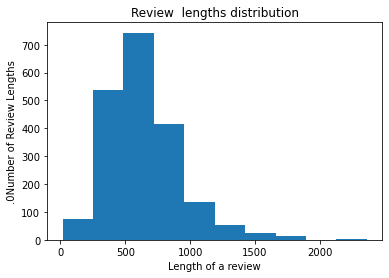

In [8]:
plt.hist(word_length)
plt.xlabel('Length of a review')
plt.ylabel('.0Number of Review Lengths')
plt.title('Review  lengths distribution')
plt.show()

(vii). To represent each text (= data point), there are many ways. In NLP/Deep
Learning terminology, this task is called tokenization. It is common to rep-
resent text using popularity/ rank of words in text. The most common word
in the text will be represented as 1, the second most common word will be
represented as 2, etc. Tokenize each text document using this method.

In [9]:
from keras.preprocessing.text import Tokenizer

# using dicionary to store list of each text document 
Tokenize_word_neg = {}
for i in range(1000):
    Tokenize_word_neg[i] = values_neg[i].split()

Tokenize_word_pos = {}
for i in range(1000):
    Tokenize_word_pos[i] = values_pos[i].split()

# convert all into list 
item_neg = Tokenize_word_neg.values()
item_neg = list(item_neg)

item_pos = Tokenize_word_pos.values()
item_pos = list(item_pos)

# create the tokenizer
t = Tokenizer()

# fit the tokenizer on the neg documents
neg_result = []
for i in range(1000):
    t.fit_on_texts(item_neg[i])
    neg_result.append(t.word_index)

# fit the tokenizer on the pos documents   
t_1 = Tokenizer()
pos_result = []
for i in range(1000):
    t_1.fit_on_texts(item_pos[i])
    pos_result.append(t_1.word_index)

In [10]:
# Tokenize results of all negative documents
k = [str('neg_cv_')+ str(i) for i in range(1000)]
Tokenize_neg_df = pd.DataFrame(np.column_stack([k , neg_result]))
Tokenize_neg_df = Tokenize_neg_df.rename(columns={0: 'neg_name', 1: 'Neg_Tokenize_result'})
Tokenize_neg_df

,neg_name,Neg_Tokenize_result
0,neg_cv_0,"{'the': 1, 'it': 2, 'and': 3, 'to': 4, 'of': 5..."
1,neg_cv_1,"{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'it': 5,..."
2,neg_cv_2,"{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'it': 5,..."
3,neg_cv_3,"{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5,..."
4,neg_cv_4,"{'the': 1, 'a': 2, 'and': 3, 'to': 4, 'of': 5,..."
...,...,...
995,neg_cv_995,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5,..."
996,neg_cv_996,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5,..."
997,neg_cv_997,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5,..."
998,neg_cv_998,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5,..."


In [11]:
# Tokenize results of all positive documents
k = [str('pos_cv_')+ str(i) for i in range(1000)]
Tokenize_pos_df = pd.DataFrame(np.column_stack([k , pos_result]))
Tokenize_pos_df = Tokenize_pos_df.rename(columns={0: 'pos_name', 1: 'Pos_Tokenize_result'})
Tokenize_pos_df

,pos_name,Pos_Tokenize_result
0,pos_cv_0,"{'the': 1, 'and': 2, 'in': 3, 'a': 4, 'to': 5,..."
1,pos_cv_1,"{'the': 1, 'and': 2, 'a': 3, 'in': 4, 'to': 5,..."
2,pos_cv_2,"{'the': 1, 'and': 2, 'a': 3, 'in': 4, 'of': 5,..."
3,pos_cv_3,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'is': 5,..."
4,pos_cv_4,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'in': 5,..."
...,...,...
995,pos_cv_995,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5,..."
996,pos_cv_996,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5,..."
997,pos_cv_997,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5,..."
998,pos_cv_998,"{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5,..."


(viii). Select a review length L that 70% of the reviews have a length below it. If
you feel more adventurous, set the threshold to 90%.

In [12]:
# transform into numpy array
review_length_L = np.array(word_length)

# return 70th percentile

L = int(np.percentile(review_length_L, 70)) 
print('The review_length L:', L)

The review_length L: 737


(ix). Truncate reviews longer than L words and zero-pad reviews shorter than L
so that all texts (= data points) are of length L.

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

prepad_maxlen_posttrunc_neg = []
prepad_maxlen_posttrunc_pos = []

# concate neg + pos list
t = Tokenizer()
all_doc = values_neg + values_pos
all = []
for i in all_doc:
    all.append(i)
t.fit_on_texts(all)
    
# Truncate for neg documents
for i in range(1000):
    sequences_neg = t.texts_to_sequences([all[i]])
    prepad_maxlen_posttrunc_result = pad_sequences(sequences_neg, maxlen = L)
    prepad_maxlen_posttrunc_result = prepad_maxlen_posttrunc_result.reshape(737,)
    prepad_maxlen_posttrunc_result = np.where(prepad_maxlen_posttrunc_result  >= 5000, 0, prepad_maxlen_posttrunc_result )
    prepad_maxlen_posttrunc_neg.append(prepad_maxlen_posttrunc_result)
    
# Truncate for pos documents 
for i in range(1000,2000):
    sequences_pos = t.texts_to_sequences([all[i]])
    prepad_maxlen_posttrunc_result = pad_sequences(sequences_pos, maxlen = L)
    prepad_maxlen_posttrunc_result = prepad_maxlen_posttrunc_result.reshape(737,)
    prepad_maxlen_posttrunc_result = np.where(prepad_maxlen_posttrunc_result  >= 5000, 0, prepad_maxlen_posttrunc_result )
    prepad_maxlen_posttrunc_pos.append(prepad_maxlen_posttrunc_result)    

## 1-(c) Word Embeddings

(i). One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. "Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes
the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning". Most deep learning modules (including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an "Embedding layer". The
layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the "output dimension". We would like to use a word embedding layer for this project. Assume that we are interested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document. If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 * L matrix.

(ii). Flatten the matrix of each document to a vector.

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.text import one_hot

In [15]:
# Create the Embedding model
model_MLP = Sequential()
model_MLP.add(Embedding(5000, 32, input_length=737)) 

## 1-(d) Multi-Layer Perceptron
(i). Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

In [16]:
# Concat and transfer into a dataframe
k   = [str('neg_cv_')+ str(i) for i in range(1000)]
k_1 = [str('pos_cv_')+ str(i) for i in range(1000)]
d   = [0  for i in range(1000)]
d_1 = [1  for i in range(1000)]

negneg = pd.DataFrame(prepad_maxlen_posttrunc_neg)
negneg['Class'] = d
negneg['doc_name'] = k
pospos = pd.DataFrame(prepad_maxlen_posttrunc_pos)
pospos['Class'] = d_1
pospos['doc_name'] = k_1
df_1   = pd.concat([negneg, pospos], axis =0, ignore_index= True)

In [17]:
#Separate into Train and test data
df_train =  pd.concat([df_1[:700], df_1[1000:1700]], axis =0)
df_test  =  pd.concat([df_1[700:1000], df_1[1700:2000]], axis =0)  

In [18]:
# Create the MLP model
model_MLP.add(Flatten())
model_MLP.add(Dense(50, activation='relu'))
model_MLP.add(Dropout(0.2))
model_MLP.add(Dense(50, activation='relu'))
model_MLP.add(Dropout(0.5))
model_MLP.add(Dense(50, activation='relu'))
model_MLP.add(Dropout(0.5))
model_MLP.add(Dense(1, activation='sigmoid'))
model_MLP.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_MLP.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
 dense (Dense)               (None, 50)                1179250   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2

In [19]:
# Get X_train, y_train, X_test, y_test
X_train =  df_train.iloc[:,0:737]
y_train =  df_train['Class']
X_test  =  df_test.iloc[:,0:737]
y_test  =  df_test['Class']

# Fit the model
model_MLP.fit(X_train, y_train, epochs=2, batch_size=10)

Epoch 1/2
140/140 [==============================] - 2s 8ms/step - loss: 0.6963 - accuracy: 0.5007
Epoch 2/2
140/140 [==============================] - 1s 8ms/step - loss: 0.6684 - accuracy: 0.5843


(ii). Report the train and test accuracies of this model.

In [20]:
# Metrics
loss_train_MLP, accuracy_train_MLP = model_MLP.evaluate(X_train, y_train, verbose = 2)
loss_test_MLP, accuracy_test_MLP = model_MLP.evaluate(X_test, y_test, verbose = 2)
print("Train Accuracy", accuracy_train_MLP)
print("Test Accuracy", accuracy_test_MLP)

44/44 - 0s - loss: 0.4872 - accuracy: 0.7993 - 260ms/epoch - 6ms/step
19/19 - 0s - loss: 0.6776 - accuracy: 0.5383 - 61ms/epoch - 3ms/step
Train Accuracy 0.7992857098579407
Test Accuracy 0.5383333563804626


## 1-(e) One-Dimensional Convolutional Neural Network:
Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

(i). After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

In [21]:
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
# Create the CNN model
model_CNN = Sequential()
model_CNN.add(Embedding(5000, 32, input_length=737))  
model_CNN.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size = 2, strides=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(50, activation='relu'))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(50, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(50, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(1, activation='sigmoid'))
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_CNN.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 737, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 735, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 367, 32)          0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 11744)             0         
                                                                 
 dense_4 (Dense)             (None, 50)                587250    
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                      

In [22]:
# Fit the model
model_CNN.fit(X_train, y_train, epochs=2, batch_size=10)

Epoch 1/2
140/140 [==============================] - 1s 7ms/step - loss: 0.6965 - accuracy: 0.4957
Epoch 2/2
140/140 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5193


(ii). Report the train and test accuracies of this model.

In [23]:
# Metrics
loss_train_CNN, accuracy_train_CNN = model_CNN.evaluate(X_train, y_train, verbose = 2)
loss_test_CNN, accuracy_test_CNN = model_CNN.evaluate(X_test, y_test, verbose = 2)
print("CNN: Train Accuracy", accuracy_train_CNN)
print("CNN: Test Accuracy", accuracy_test_CNN)

44/44 - 0s - loss: 0.6815 - accuracy: 0.7257 - 255ms/epoch - 6ms/step
19/19 - 0s - loss: 0.6912 - accuracy: 0.5483 - 77ms/epoch - 4ms/step
CNN: Train Accuracy 0.7257142663002014
CNN: Test Accuracy 0.5483333468437195


## 1-(f) Long Short-Term Memory Recurrent Neural Network:
The structure of the LSTM we are going to use is shown in the following figure.

(i). Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

In [24]:
# Create the CNN model
from keras.layers.recurrent import LSTM

model_LSTM = Sequential()
model_LSTM.add(Embedding(5000, 32, input_length=737))  #prepad_maxlen_posttrunc_neg[i].shape[0]
model_LSTM.add(LSTM(32))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(256, activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_LSTM.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 737, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 256)               8448      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 177,025
Trainable params: 177,025
Non-tr

(ii). Report the train and test accuracies of this model.

In [25]:
# Fit the model
model_LSTM.fit(X_train, y_train, epochs=2, batch_size=10)

Epoch 1/2
140/140 [==============================] - 24s 159ms/step - loss: 0.6934 - accuracy: 0.5093
Epoch 2/2
140/140 [==============================] - 23s 165ms/step - loss: 0.5327 - accuracy: 0.7593


In [26]:
# Metrics
loss_train_LSTM, accuracy_train_LSTM = model_LSTM.evaluate(X_train, y_train, verbose = 2)
loss_test_LSTM, accuracy_test_LSTM = model_LSTM.evaluate(X_test, y_test, verbose = 2)
print("CNN: Train Accuracy", accuracy_train_LSTM)
print("CNN: Test Accuracy", accuracy_test_LSTM)

44/44 - 2s - loss: 0.2114 - accuracy: 0.9364 - 2s/epoch - 43ms/step
19/19 - 1s - loss: 0.5755 - accuracy: 0.7067 - 823ms/epoch - 43ms/step
CNN: Train Accuracy 0.9364285469055176
CNN: Test Accuracy 0.7066666483879089


### 3 References

1. Text Classification With Python and Keras
https://realpython.com/python-keras-text-classification/

2. Remove the punctuation and numbers
https://datagy.io/python-remove-punctuation-from-string/#:~:text=Conclusion-,Use%20Python%20to%20Remove%20Punctuation%20from%20a%20String%20with%20Translate,translate()%20method.

3. Count the number of unique words
https://stackoverflow.com/questions/33726361/counting-the-number-of-unique-words-in-a-list

4. Padding
https://towardsdatascience.com/nlp-preparing-text-for-deep-learning-model-using-tensorflow2-461428138657#:~:text=Padding%20at%20the%20beginning%20allows,careful%20consideration%20and%20business%20knowledge

5. Word-Embedding in Keras
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

6. 1D Convolutional Neural Network Models 
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

7. A Gentle Introduction to Long Short-Term Memory Networks by the Experts
https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/